In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Using Gibbs' Phase rule, we see that the degree of freedom (DOF) is 2, meaning we need to specify two variables to get all the information required for the system. Given that we are working with an isobaric system, P is specified. We can assume x and solve further. 

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
First, we use Antoine's equation to get initial values for T<sub>i</sub><sup>sat</sup>, i=1,2. Put P as P<sub>sat</sub>. \
P = 101.325 kPa (Given)

T<sub>i</sub><sup>sat</sup> = B<sub>i</sub> / (A<sub>i</sub> - log P) - C<sub>i</sub> \
A<sub>1</sub> = 8.11220, B<sub>1</sub> = 1592.864, C<sub>1</sub> = 226.184 \
A<sub>2</sub> = 8.07131, B<sub>2</sub> = 1730.630, C<sub>2</sub> = 233.426 

In [2]:
P, A1, B1, C1, A2, B2, C2 = 760, 8.11220, 1592.864, 226.184, 8.07131, 1730.630, 233.426
T1_sat = B1/(A1 - math.log10(P)) - C1
T2_sat = B2/(A2 - math.log10(P)) - C2

In [3]:
x1 = np.linspace(0, 1.0, num = 101)
x2 = 1 - x1

In [4]:
v1l, v2l, A12, A21, R = 58.69, 18.07, 337.3891, 974.6748, 1.9872
y = []
Temp = []

As an initial guess value, we take T to be equal to the weighted mean of T<sub>1</sub><sup>sat</sup> and T<sub>2</sub><sup>sat</sup>, with the weights being equal to the molar fractions of the two components, i.e. x<sub>1</sub> and x<sub>2</sub>. Once we have this value of temperature, we can calculate the activity coefficients $\gamma1$ and $\gamma2$, as well as the saturation pressures P<sub>1</sub><sup>sat</sup> and P<sub>2</sub><sup>sat</sup>. Now, we can get an estimate of P<sub>1</sub><sup>sat</sup>, by using the values of $\gamma1$ and $\gamma2$. 

In [5]:
for i in range (101):
    T = T1_sat*x1[i] + T2_sat*x2[i]
    del12 = v2l/v1l * math.exp(-A12/(R*(T+273.15)))
    del21 = v1l/v2l * math.exp(-A21/(R*(T+273.15)))
    gamma1 = math.exp(-math.log(x1[i] + del12*x2[i]) + x2[i]*(del12/(x1[i] + del12*x2[i]) - del21/(x2[i] + del21*x1[i])))
    gamma2 = math.exp(-math.log(x2[i] + del21*x1[i]) - x1[i]*(del12/(x1[i] + del12*x2[i]) - del21/(x2[i] + del21*x1[i])))
    P1sat = 10**(A1 - B1/(T + C1))
    P2sat = 10**(A2 - B2/(T + C2))
    alpha = P1sat/P2sat
    err = 1
    while(err > 0.01):
        T_old = T
        P1sat = P/((x1[i]*gamma1) + (x2[i]*gamma2/alpha))
        T = B1/(A1 - math.log10(P1sat)) - C1
        P1sat = 10**(A1 - B1/(T + C1))
        P2sat = 10**(A2 - B2/(T + C2))
        alpha = P1sat/P2sat
        del12 = v2l/v1l * math.exp(-A12/(R*(T+273.15)))
        del21 = v1l/v2l * math.exp(-A21/(R*(T+273.15)))
        gamma1 = math.exp(-math.log(x1[i] + del12*x2[i]) + x2[i]*(del12/(x1[i] + del12*x2[i]) - del21/(x2[i] + del21*x1[i])))
        gamma2 = math.exp(-math.log(x2[i] + del21*x1[i]) - x1[i]*(del12/(x1[i] + del12*x2[i]) - del21/(x2[i] + del21*x1[i])))
        err = abs((T - T_old)/T_old*100)
    Temp.append(T)
    y.append(x1[i]*gamma1*P1sat/P)
exp_T = np.array([98.93, 97.05, 92.3, 88.32, 87.47, 85.49, 84.75, 84.34, 83.47, 83.42, 82.94, 82.5, 82.56, 81.99, 81.84, 80.90, 80.92, 79.91, 76.15])
exp_x = np.array([0.0044, 0.0110, 0.0340, 0.0680, 0.0770, 0.1160, 0.1350, 0.1470, 0.1770, 0.1780, 0.2070, 0.2330, 0.2360, 0.2700, 0.2870, 0.3610, 0.3700, 0.4800, 0.9040])
exp_y = np.array([0.0510, 0.1230, 0.2610, 0.3830, 0.4110, 0.4640, 0.4760, 0.4990, 0.5160, 0.5190, 0.5360, 0.5440, 0.5410, 0.5620, 0.5720, 0.6050, 0.6010, 0.6450, 0.9000])

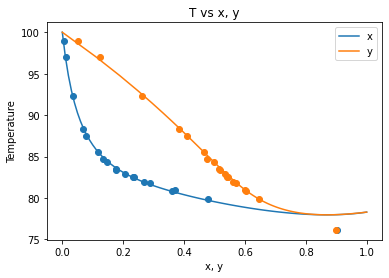

In [6]:
plt.plot(x1, Temp)
plt.scatter(exp_x, exp_T)
plt.plot(y, Temp)
plt.scatter(exp_y, exp_T)
plt.title("T vs x, y")
plt.xlabel('x, y')
plt.ylabel('Temperature')
plt.legend(["x", "y"], loc = "upper right")

Text(0, 0.5, 'y')

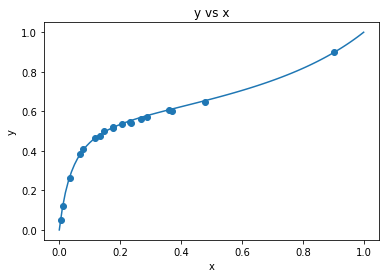

In [7]:
plt.plot(x1, y)
plt.scatter(exp_x, exp_y)
plt.title("y vs x")
plt.xlabel('x')
plt.ylabel('y')